# Goos-Hanchen experiment
***

This notebook contains the data reduced from the usual Larmor Mantid reduction file. The experiment took place at Larmor beamline at ISIS from Nov 14-20th 2023. The reduced data is also contained in this github repository along with copies of the experiment log and pictures of the physical setup.

While the goal is to measure the Goos-Hanchen spatial shift of the two neutron spin states, it seems at the moment that we can only experimentally measure the phase shift between the two spin states. Again, the issue of the intrinsic coherence length of neutron pops up: Quan has shown some interesting potentially-observable effects in the different regiemes, but it is unclear how to exactly experimentally produce his proposed setups.

***
### Sample information
The two identical samples (assuming natural abundances) consist of the following layers with scattering length densities (SLDs) given in units of 10^-6 A^-2:
1. 50 nm Ti, SLD = -1.910
2. 50 nm Fe-Co-V 50-48-2%:
   1. Nuclear: SLD = 5.121
   2. Magnetic: SLD = -5.451 and 5.409
   3. Total: SLD = -0.33 and 10.53
4. 50 nm Si O_2, SLD = 2.06
5. 50 nm Fe-Co-V 50-48-2%
6. 100 nm Ni-Mo 88-12% (non-magnetic), SLD = -8.52
7. Si O_2 substrate (total size 100 mm x 50 mm x 0.78 mm)

The sample can be magnetized in a ~200 G field.

We also have two identical non-magnetic blanks:
1. 100 nm Ni-Mo 88-12%
2. Si substrate (total size 100 mm x 50 mm x 0.78 mm)

***
### Problems/questions with the experiment:
1. The film's easy axis and the plane of incidence are orthogonal: therefore, the beam size on target will be cut in half if we want the remnant mangetization to be parallel to the guide field at the sample position (vertical direction)
   1. We can stack the two films back-to-back to create a better return loop for the magnetic flux lines at the sample position. We can also use iron foil to do the same.
   2. a

***
### Current experimental plan:
1. Mount and measure the blank
   1. a
   2. a
2. Two
   1. a
   2. a
3. Three

## Functions and constants

In [1]:
import numpy as np
import sympy as sym
import scipy as sc
import sympy as sym
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','notebook', 'grid','default','bright'])
SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE = 15,18,20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', titlesize=BIGGER_SIZE)    # actually gets title font size

sym.init_printing()

DEFAULT_PLOT_PARMS = {'title':'','xlab':'','ylab':'','multi_plot':True,'size':(8,5),'lw':3}  #mutliplot not implemented yet
SLD_PLOT_PARMS = DEFAULT_PLOT_PARMS|{'xlab':'Depth [AA]','ylab':'SLD [1e-6 AA^-2]','labels':['']}

def plot_function(xdata,ydata,plot_parms=DEFAULT_PLOT_PARMS):
    '''General function to plot given data.'''
    assert len(xdata) == len(ydata), 'Len mismatch between x and y data!'
    fig,ax = plt.subplots(figsize=plot_parms['size'])
    
    for indx,(x,y) in enumerate(zip(xdata,ydata)):
        ax.plot(x,y,'--',linewidth=plot_parms['lw'],label=plot_parms['labels'][indx])
    ax.set(title=plot_parms['title'],xlabel=plot_parms['xlab'],ylabel=plot_parms['ylab'])
    if plot_parms['labels'] is not None: plt.legend()

    plt.grid()
    plt.tight_layout()
    plt.show()

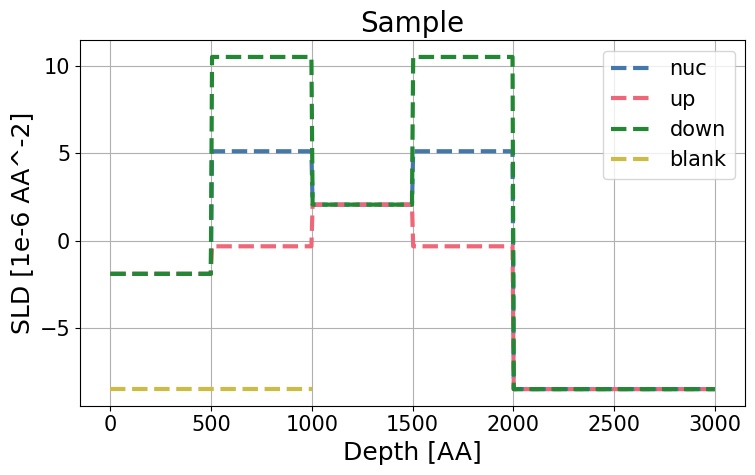

In [2]:
LAMS = np.linspace(3,10,200)  #wavelength range at Larmor (AA)

def get_crit(SLD,lam=LAMS,degrees=True):
    '''Returns critical angle.'''
    result = lam*np.sqrt(SLD/np.pi)
    if degrees: result *= 180/np.pi
    return result

def get_pot(SLDs=[],ts=[],plot=False,plot_parms=SLD_PLOT_PARMS):
    '''Returns the potential given the thicknesses and SLDs of each layer.
    Doesn't include substrate.'''
    total_x = np.linspace(0,np.sum(ts),500)
    steps = np.array([np.sum(ts[:i]) for i in range(len(ts)+1)])
    potential = np.sum([SLDs[indx]*((steps[indx]<=total_x)&(total_x<=steps[indx+1])) for indx in range(len(SLDs))],axis=0)
    if plot: plot_function([total_x],[potential],plot_parms)
    return potential,total_x

def get_SLD(nuc,spin,mag):
    '''Returns total scattering length density.'''
    return nuc

#check up vs down SLDs
SLDs = {'Ti':-1.910,'FeCoV_nuc':5.121,'FeCoV_up':-0.33,'FeCoV_down':10.53,'Si':2.06,'NiMo':-8.52}

sample_ts = np.array([50,50,50,50,100])*10  #convert to Angstroms
blank_ts = np.array([100])*10

sample_nuc,X = get_pot(SLDs=[SLDs['Ti'],SLDs['FeCoV_nuc'],SLDs['Si'],SLDs['FeCoV_nuc'],SLDs['NiMo']],\
                 ts=sample_ts,plot_parms=SLD_PLOT_PARMS|{'title':'Sample','labels':('nuc','up','down')})
sample_up,_ = get_pot(SLDs=[SLDs['Ti'],SLDs['FeCoV_up'],SLDs['Si'],SLDs['FeCoV_up'],SLDs['NiMo']],\
                 ts=sample_ts,plot_parms=SLD_PLOT_PARMS|{'title':'Sample','labels':('up')})
sample_down,_ = get_pot(SLDs=[SLDs['Ti'],SLDs['FeCoV_down'],SLDs['Si'],SLDs['FeCoV_down'],SLDs['NiMo']],\
                 ts=sample_ts,plot_parms=SLD_PLOT_PARMS|{'title':'Sample','labels':('down')})
blank,Xb = get_pot([SLDs['NiMo']],ts=blank_ts,plot_parms=SLD_PLOT_PARMS|{'title':'Sample','labels':('blank')})

plot_function([X,X,X,Xb],[sample_nuc,sample_up,sample_down,blank],\
              plot_parms=SLD_PLOT_PARMS|{'title':'Sample','labels':('nuc','up','down','blank')})

#blank = get_pot(SLDs=[],ts=[50,50,50,50,100],plot=False,plot_parms=SLD_PLOT_PARMS|{'title':'Blank'})

In [ ]:
print(sc.integrate.trapezoid(sample_nuc,x=X))  #checking area of SLD profile
print(sc.integrate.trapezoid(sample_up,x=X))
print(sc.integrate.trapezoid(sample_down,x=X))

## Analytic calculations

Interaction:


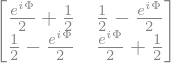

In [4]:
def get_su2_state(theta=0,phi=0,alpha=None,beta=None,gamma=0):
    '''Returns spin state, either with the usual parameterization or two complex numbers.'''
    if alpha is None or beta is None:
        result = [sym.cos(theta/2),sym.sin(theta/2)*sym.exp(sym.I*phi)]
    else:
        norm = sym.sqrt(sym.abs(alpha)**2 + sym.abs(beta)**2)
        result = 1/norm*[alpha,beta]
    return sym.exp(sym.I*gamma)*sym.Matrix(result).applyfunc(sym.simplify)

def get_op(a=0,b=0,c=0,d=0):
    '''Returns general operator in terms of the pauli vector.'''
    result = a*sym.eye(2) + b*sym.Matrix([[0,1],[1,0]]) + \
    c*sym.Matrix([[0,-sym.I],[sym.I,0]]) + d*sym.Matrix([[1,0],[0,-1]])
    return result.applyfunc(sym.simplify)

def get_proj(op,sign=1):
    '''Returns up/down projection operator.'''
    assert sign == -1 or sign == 1, 'The sign must be +/-1.'
    return (sym.Rational(1,2)*(sym.eye(2) + sign*op)).applyfunc(sym.simplify)

def expect(lstate,op,rstate=None,force_real=True):
    '''Returns the expectation value from the given state and operator.'''
    if rstate is None: rstate = lstate
    result = (lstate.H*op*rstate)[0]
    if force_real: result = sym.re(result)
    return result.simplify()

def change_basis(op,new):
    '''Returns operator in new basis.'''
    return (new*op*new.inv()).applyfunc(sym.simplify)

p0,p1,p2,t1,t2,P1,P2,P = sym.symbols(r'\phi_0,\phi_1,\phi_2,\theta_1,\theta_2,\Phi_1,\Phi_2,\Phi',real=True)
idt,spx,spy,spz = get_op(a=1),get_op(b=1),get_op(c=1),get_op(d=1)

#asummes the magnetization is along the x-direction and incident polarization is along z
x_cob = sym.Rational(1,2)*sym.Matrix([[1,1],[1,-1]])
interaction = change_basis(sym.diag(1,sym.exp(sym.I*P)),x_cob)
print('Interaction:')
display(interaction.applyfunc(sym.simplify))

Evolution of the spin states:


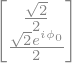

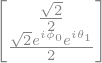

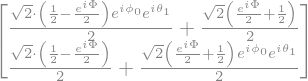

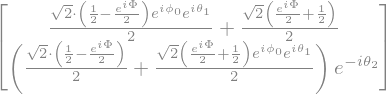

In [7]:
print('Evolution of the spin states:')
psi0 = get_su2_state(theta=sym.pi/2,phi=p0)  #phi_0 for incident polarization along x-direction
display(psi0)
psi1 = get_op(a=(1+sym.exp(sym.I*t1))/2,d=(1-sym.exp(sym.I*t1))/2)*psi0
display(psi1)
psi2 = interaction*psi1
display(psi2)
psi3 = get_op(a=(1+sym.exp(-sym.I*t2))/2,d=(1-sym.exp(-sym.I*t2))/2)*psi2
display(psi3)

In [6]:
print('Final polarization components:')
for i,k in zip(['Px','Py','Pz'],[spx,spy,spz]):
    print(i,':')
    pk = expect(psi3,k).subs(p0,0).expand().simplify()
    display(pk)
    print('At echo, theta_1 = theta_2')
    pk = pk.subs(t2,t1).expand().simplify()
    display(pk)
    print('No interaction, Phi = 0')
    pk = pk.subs(P,0).expand().simplify()
    display(pk)
    print('\n')

Final polarization components:
Px :


At echo, theta_1 = theta_2


No interaction, Phi = 0




Py :


At echo, theta_1 = theta_2


No interaction, Phi = 0




Pz :


At echo, theta_1 = theta_2


No interaction, Phi = 0


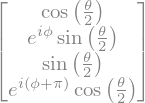

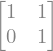

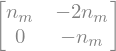

In [20]:
nm,theta,phi = sym.symbols(r'n_m,\theta,\phi',real=True)
c1,c2 = get_su2_state(theta=theta,phi=phi),get_su2_state(theta=sym.pi-theta,phi=phi+sym.pi)
gen_basis = sym.Matrix([c1,c2])
display(gen_basis)

gen_basis = sym.Matrix([[1,1],[0,1]])
display(gen_basis)

gen_mag = change_basis(sym.diag(nm,-nm),gen_basis)
display(gen_mag)

## Experiment log
***

### 11/14 Day One
Setup and calibration of the beamline

### 11/15 Day Two
text

## Testing space
***